Sentiment Analysis of IMDB reviews

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
df=pd.read_csv("IMDB Dataset.csv")

In [44]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [45]:
df.shape

(50000, 2)

In [46]:
vc_df=pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns=['sentiment','count']
vc_df['sentiment']=vc_df['sentiment'].map({0:'positive',1:'negative'})
vc_df

,sentiment,count
0,NaN,25000
1,NaN,25000


Pre-processing the data

Some common Problems:

Remove Punctuation

Replace short words

Making text lower case

Remove stopwords

Lemmatization

Remove Punctuation

In [47]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [48]:
df['review_process']=df['review'].str.replace("[^A-Za-z0-9]"," ")

<ipython-input-48-d13827ae4302>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_process']=df['review'].str.replace("[^A-Za-z0-9]"," ")


In [49]:
df=df[['review','sentiment','review_process']]
df

,review,sentiment,review_process
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production br br The...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,Bad plot bad dialogue bad acting idiotic di...
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,I m going to have to disagree with the previou...


In [50]:
df['review_process']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production   br    br   The...
2        I thought this was a wonderful way to spend ti...
3        Basically there s a family where a little boy ...
4        Petter Mattei s  Love in the Time of Money  is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot  bad dialogue  bad acting  idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I m going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review_process, Length: 50000, dtype: object

Replace short words

In [51]:
'@'.join(['this','is','my','place'])

'this@is@my@place'

In [52]:
df['review_process']=df['review_process'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['review_process']

0        One the other reviewers has mentioned that aft...
1        wonderful little production The filming techni...
2        thought this was wonderful way spend time too ...
3        Basically there family where little boy Jake t...
4        Petter Mattei Love the Time Money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the Star Trek movies high art but ...
Name: review_process, Length: 50000, dtype: object

Making text lower case

In [53]:
df['review_process']=[row.lower() for row in df['review_process']]

In [54]:
df['review_process']

0        one the other reviewers has mentioned that aft...
1        wonderful little production the filming techni...
2        thought this was wonderful way spend time too ...
3        basically there family where little boy jake t...
4        petter mattei love the time money visually stu...
                               ...                        
49995    thought this movie did down right good job was...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going have disagree with the previous comment ...
49999    one expects the star trek movies high art but ...
Name: review_process, Length: 50000, dtype: object

Remove stopwords

In [55]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
stop_words=stopwords.words('english')

In [57]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
add_words = ['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character','good','like','well','would']

In [59]:
stop_words.extend(add_words)

In [62]:
def remove_stopwords(rev):
   review_tokenized=word_tokenize(rev)
   rev_new=" ".join([i for i in review_tokenized if i not in stop_words])
   return rev_new
df['review_process']=[remove_stopwords(r) for r in df['review_process']]

In [63]:
df['review_process']

0        reviewers mentioned watching episode hooked ri...
1        wonderful little production filming technique ...
2        thought wonderful way spend hot summer weekend...
3        basically family little boy jake thinks zombie...
4        petter mattei love money visually stunning mat...
                               ...                        
49995    thought right job creative original first expe...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin se...
49999    expects star trek high art fans expect best ep...
Name: review_process, Length: 50000, dtype: object

Lemmatization

In [65]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [66]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [67]:
# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_process'] = df['review_process'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df['review_processed']

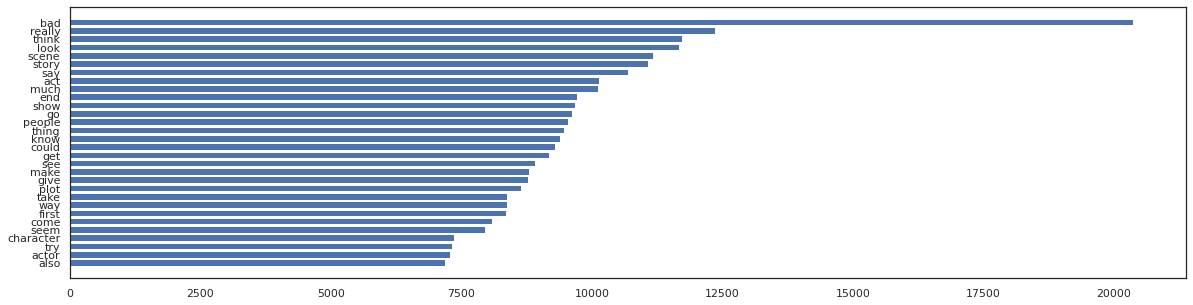

In [69]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'negative',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_process']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

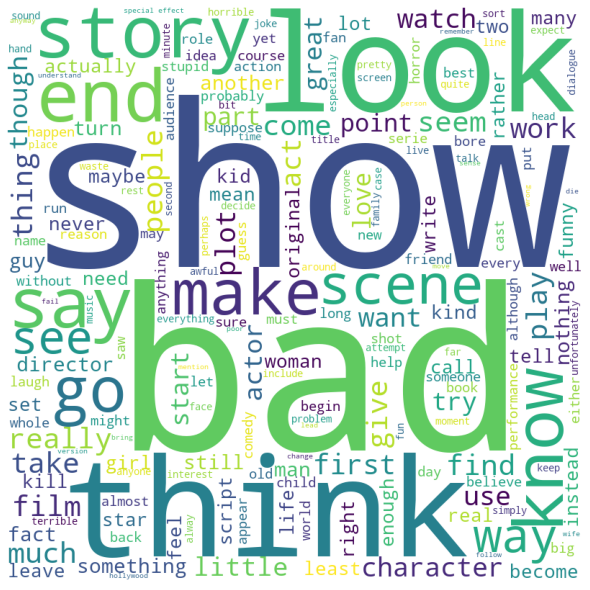

In [71]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['review_process']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [73]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.review_process).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
X_train.shape, X_test.shape

((40000, 2500), (10000, 2500))

In [75]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Building the ML model

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[3580 1377]
 [1457 3586]]
The model accuracy is 0.7166


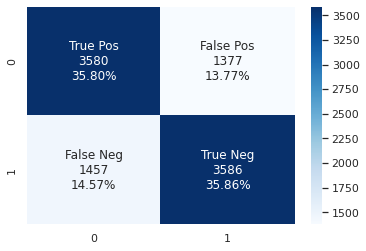

In [79]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.7166478432744886

In [81]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8488160384342025

In [82]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
110,0.131455,bad
1365,0.044130,waste
567,0.036790,great
106,0.020644,awful
441,0.017549,excellent
...,...,...
538,0.000049,gay
1338,0.000033,user
13,0.000033,accurate
1250,0.000025,taste
